<font size = 6> Machine Learning with Autodiff

***

## Libraries & Stuff

In [ ]:
import numpy as np

In [1]:
import torch

In [ ]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

.DS_Store files

find .  -name ".DS_Store" -depth -exec rm {} \;

In [1]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

In [2]:
# function to convert column of matrix to 1D vector: 
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

***

In [1]:
# representing an equation as a tensor graph

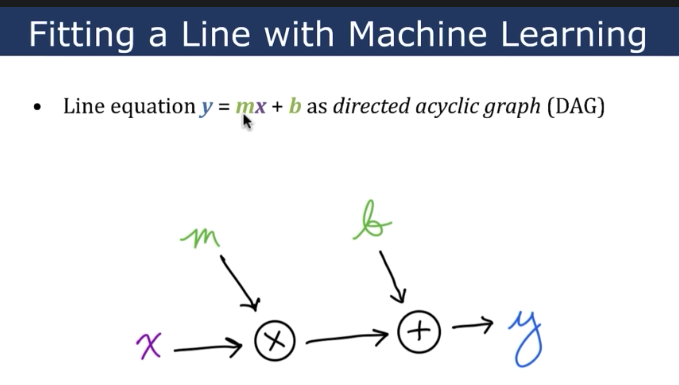

In [2]:
# DAG - directed acyclical graph

In [3]:
# consists of nodes like the four above: 

# input node: x
# output node: y

# operations can be nodes
# multiplication
# addition

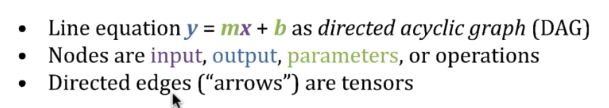

In [4]:
# edges connect nodes

# they are directed edges

# these edges are tensors

In [5]:
# there are no loops (hence acyclic)

***

In [8]:
# we will use pytorch to fid a straight line to data points

In [9]:
# we will use the Moore-Penrose Pseudoinverse mrthod (remember prior exercise)

In [3]:
x = torch.tensor([0,1,2,3,4,5,6,7.])

# E.g.: Dosage of drug for treating Alzheimer's disease

In [4]:
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

The $y$ values were created using the equation of a line $y = mx + b$. This way, we know what the model parameters to be learned are, say, $m = -0.5$ and $b = 2$. Random, normally-distributed noise has been added to simulate sampling error: 

In [13]:
# y = mx + b

# y = 

# we started with the slop of 0.5 and a y intercept of 2

In [14]:
# to the equation, we add random created noise

In [15]:
# y = -0.5*x + 2 + torch.normal(mean=torch.zeros(8), std=0.2)

In [16]:
# y

tensor([ 2.3422,  1.0445,  1.2295,  0.2549, -0.2408, -0.3993, -1.0313, -1.6898])

In [17]:
# y

tensor([ 2.3422,  1.0445,  1.2295,  0.2549, -0.2408, -0.3993, -1.0313, -1.6898])

In [18]:
# standard deviation of the noise

In [19]:
# you can play around with any values of slope and y intercept

***

For reproducibility of this demo, here's a fixed example of $y$ values obtained by running the commented-out line above: 

In [5]:
y = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37]) 

# E.g.: Patient's "forgetfulness score"

In [6]:
y

tensor([ 1.8600,  1.3100,  0.6200,  0.3300,  0.0900, -0.6700, -1.2300, -1.3700])

In [ ]:
# standard values for demo only

***

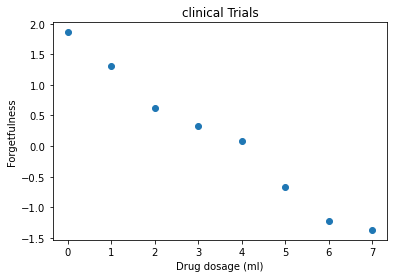

In [7]:
fig, ax = plt.subplots()
plt.title("clinical Trials")
plt.xlabel("Drug dosage (ml)")
plt.ylabel("Forgetfulness")
_=ax.scatter(x,y)

In [24]:
# we have values ofr both y and x

In [25]:
# this is where the commanilities end

# we will be using ML to apply calculus

***

Initialize the slope parameter $m$ with a "random" value of 0.9...

(**N.B.**: In this simple demo, we could guess approximately-correct parameter values to start with. Or, we could use an algebraic (e.g., Moore-Penrose pseudoinverse) or statistical (e.g., ordinary-least-squares regression) to solve for the parameters quickly. This tiny machine learning demo with two parameters and eight data points scales, however, to millions of parameters and millions of data points. The other approaches -- guessing, algebra, statistics -- do not come close to scaling in this way.)

In [26]:
# other ways to come up with a value of m

# algebra - Moore Pensore Pseudoinverse

# statistics - orginary least squares regression

# just guess

# however, nothing scales the way machine learning applies calculus

In [27]:
# millions of data pints, millions of parameters

***

In [28]:
# set the required grad value to true

In [8]:
m = torch.tensor([0.9]).requires_grad_()

In [9]:
m

tensor([0.9000], requires_grad=True)

In [10]:
b = torch.tensor([0.1]).requires_grad_()

In [11]:
b

tensor([0.1000], requires_grad=True)

In [35]:
# w ejust deliberately picked a y interfce of 0.1 (whereas it willbe closer to 2)

# just to see the model learning

***

In [12]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

In [15]:
def regression_plot(my_x, my_y, my_m, my_b):
    
    fig, ax = plt.subplots()

    ax.scatter(my_x, my_y)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()
    
    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

In [13]:
# def regression_plot(my_x, my_y, my_m, my_b):
    
#     fig, ax = plt.subplots()

#     ax.scatter(my_x, my_y)

#     '''
    
#     x_min, x_max = ax.get_xlim()
#     y_min = regression(x_min, my_m, my_b).detach().item()
#     y_max = regression(x_max, my_m, my_b).detach().item()
#     '''
    
    
#     x_min, x_max = ax.get_xlim()
#     y_min, y_max = my_m*x_min + my_b, my_m*x_max + my_b
    
#     ax.set_xlim([x_min, x_max])
#     _ = ax.plot([x_min, x_max], [y_min, y_max])

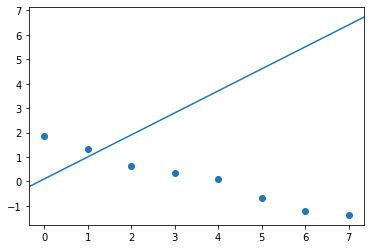

In [16]:
regression_plot(x, y, m, b)

In [17]:
# we are trying to git a line to the data based on values of m & b (as above)

In [18]:
# we can see that the line does not fit

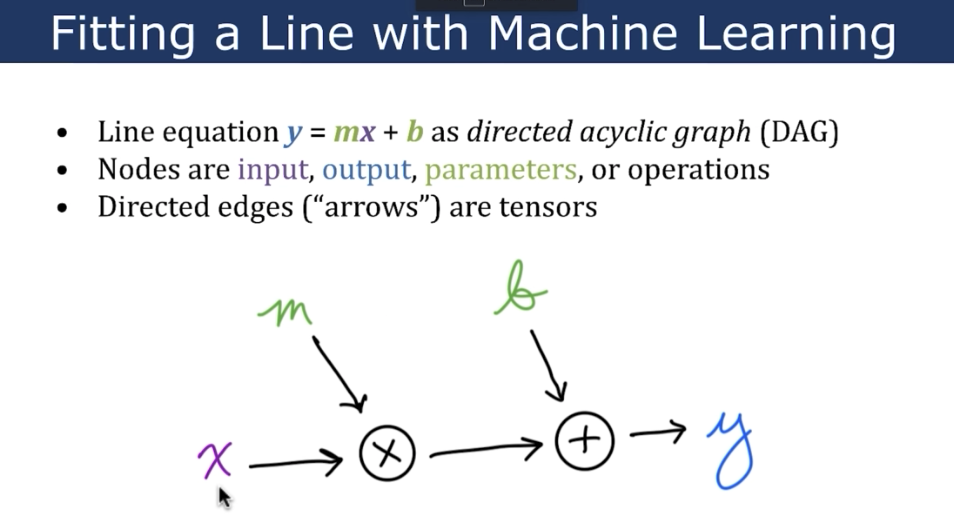

In [19]:
# we will next try this with machine learning

In [20]:
# we have the components of the DAG, we now need to link them together as a DAG